# Comparing Classifiers

### Overview

The goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) to predict  if the client will subscribe a bank term deposit (variable y).

###Objectives
1. Understand the relationship between various features and the target variable 'y'
2. Build and evaluate the 3 classifier models to predict if a customer will sign up for bank term after the campaign
3. Provide actionable insights based on model findings

### Dataset
The dataset is obtained from https://archive.ics.uci.edu/ml/datasets/bank+marketing. The data set used is 10% random sampling of the original dataset so as to test more computationally demanding machine learning algorithms (e.g., SVM).
### Input variables:
###Bank client data:
      1 - age (numeric)
      2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
      3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
      4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
      5 - default: has credit in default? (categorical: "no","yes","unknown")
      6 - housing: has housing loan? (categorical: "no","yes","unknown")
      7 - loan: has personal loan? (categorical: "no","yes","unknown")

### Related with the last contact of the current campaign:
      8 - contact: contact communication type (categorical: "cellular","telephone")     
      9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
      10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
      11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
      12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
      13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
      14 - previous: number of contacts performed before this campaign and for this client (numeric)
      15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and economic context attributes

      16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
      17 - cons.price.idx: consumer price index - monthly indicator (numeric)
      18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
      19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
      20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
      21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing attribute values are coded with "unknown"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_data = '/content/gdrive/My Drive/Practical_Application_3'
#data_bank_additional = pd.read_csv('/content/gdrive/MyDrive/Practical_Application_3/bank+marketing/bank-additional/bank-additional/bank-additional.csv',header=None)


Mounted at /content/gdrive


In [4]:
#data_bank_additional = pd.read_csv('data/bank-additional.csv',header=None)
data_bank_additional = pd.read_csv('data/bank-additional.csv',header=None)

# Exploratory Data Analysis (EDA)

In [5]:
data_bank_additional.head()

,0
0,"age;""job"";""marital"";""education"";""default"";""hou..."
1,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
2,"39;""services"";""single"";""high.school"";""no"";""no""..."
3,"25;""services"";""married"";""high.school"";""no"";""ye..."
4,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."


In [6]:
#All the columns is bunched into 1 column separated by ';' in the original file. Separating into individual columns
column_names1 = data_bank_additional.iloc[0,0].split(';')
column_names1 = [name.replace('"','') for name in column_names1]
data_bank_additional_values = data_bank_additional.iloc[1:,0].str.split(';',expand=True)
data_bank_additional_values = data_bank_additional_values.applymap(lambda x: x.replace('"','') if isinstance(x,str) else x)
data_bank_additional_values.columns = column_names1
data_bank_additional_values.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
2,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


In [7]:
data_bank_additional_values.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,67,12,4,8,3,3,3,2,10,5,...,25,21,7,3,10,26,26,234,11,2
top,32,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,216,1012,2509,1264,3315,2175,3349,2652,1378,860,...,1764,3959,3523,3523,1626,758,758,274,1626,3668


In [8]:
data_bank_additional_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 1 to 4119
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4119 non-null   object
 1   job             4119 non-null   object
 2   marital         4119 non-null   object
 3   education       4119 non-null   object
 4   default         4119 non-null   object
 5   housing         4119 non-null   object
 6   loan            4119 non-null   object
 7   contact         4119 non-null   object
 8   month           4119 non-null   object
 9   day_of_week     4119 non-null   object
 10  duration        4119 non-null   object
 11  campaign        4119 non-null   object
 12  pdays           4119 non-null   object
 13  previous        4119 non-null   object
 14  poutcome        4119 non-null   object
 15  emp.var.rate    4119 non-null   object
 16  cons.price.idx  4119 non-null   object
 17  cons.conf.idx   4119 non-null   object
 18  euribor3

In [9]:
#check the distribution of the target variable
target_distribution = data_bank_additional_values['y'].value_counts(normalize=True)*100
print(target_distribution)

no     89.05074
yes    10.94926
Name: y, dtype: float64


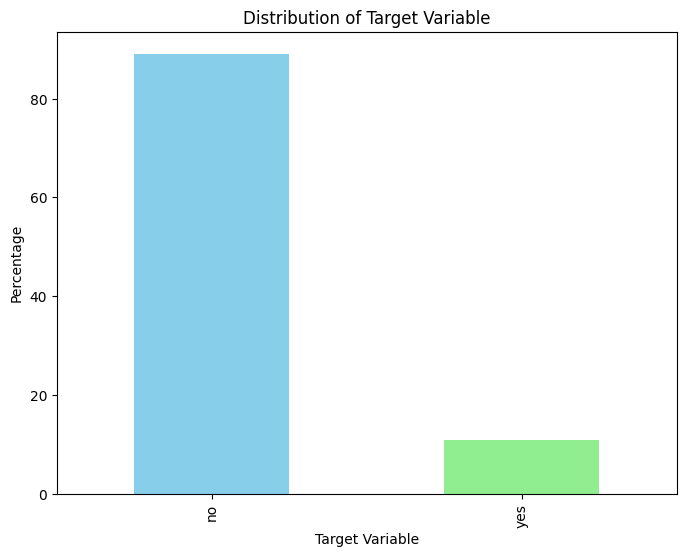

In [8]:
#plot the distribution
plt.figure(figsize=(8,6))
target_distribution.plot(kind='bar',color=['skyblue','lightgreen'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Percentage')
#plt.savefig('/content/gdrive/MyDrive/Practical_Application_3/target_distribution.png')
plt.savefig('Images/target_distribution.png')
plt.show()

In [10]:
#Since all the column data types is object, let's convert the ones with number value to numeric
numeric_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in numeric_cols:
  try:
    data_bank_additional_values[col] = pd.to_numeric(data_bank_additional_values[col],errors='coerce')
  except ValueError as e:
    print(f"Error converting column {col}: {e}")

numeric_features = data_bank_additional_values.select_dtypes(include=['number', 'datetime'])

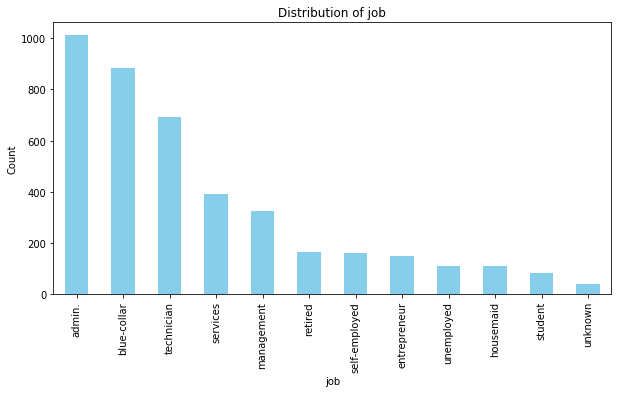

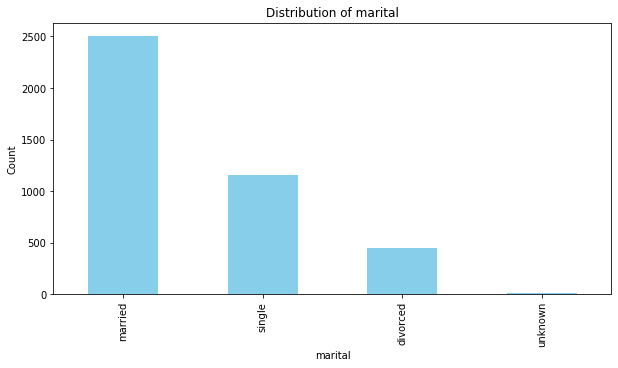

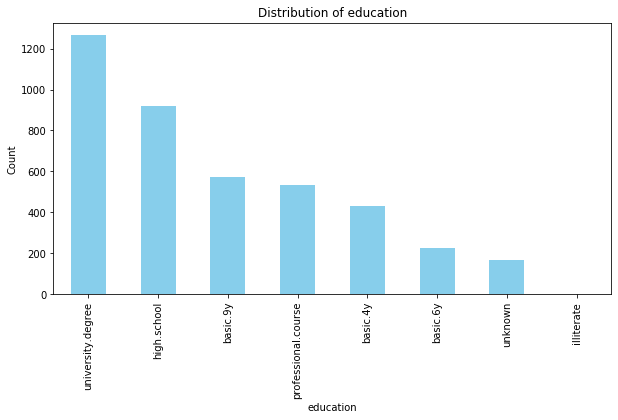

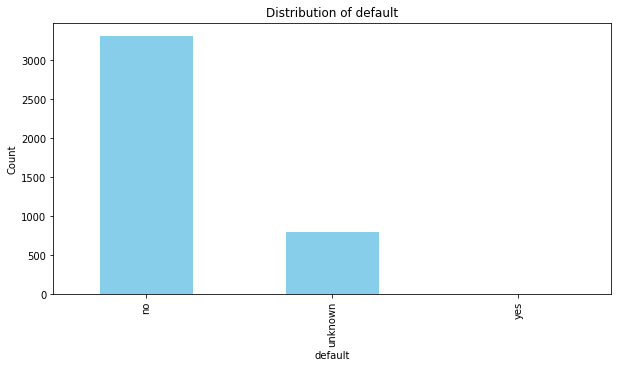

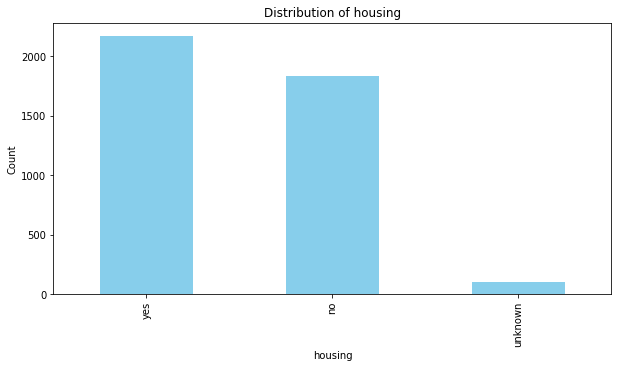

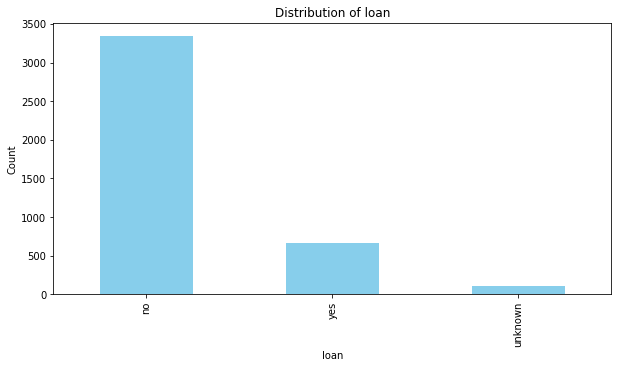

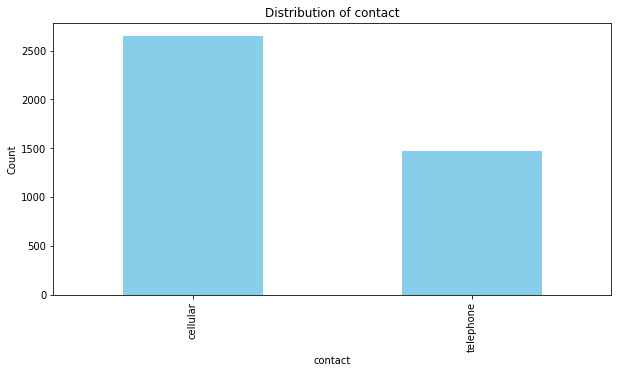

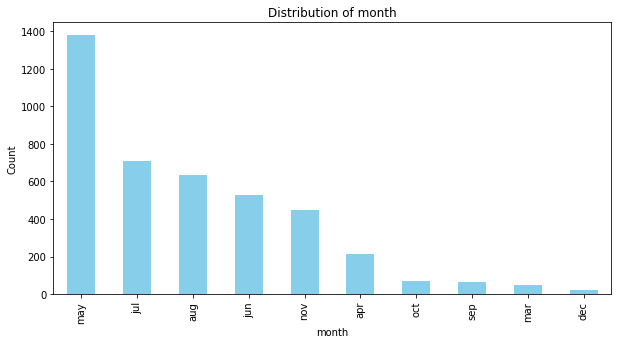

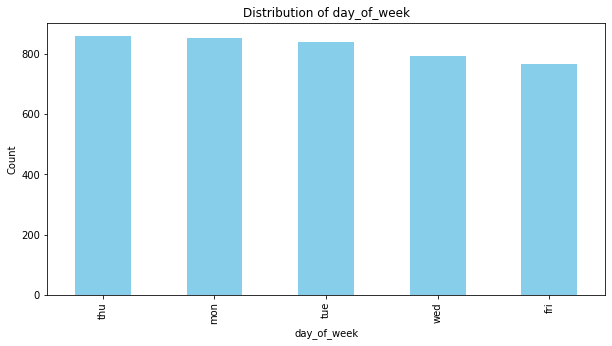

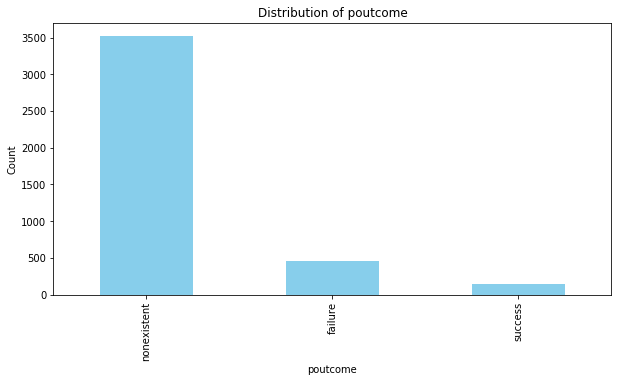

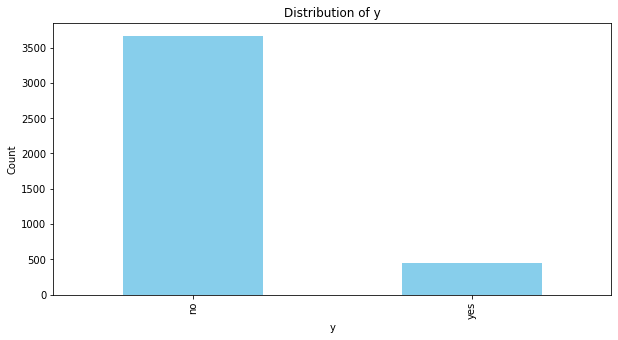

In [11]:
#Analyze the Categorical Features
import os
categorical_features =  data_bank_additional_values.select_dtypes(include=['object'])
#save_directory = '/content/gdrive/MyDrive/Practical_Application_3/'
save_directory = 'Images/'
for feature in categorical_features:
  plt.figure(figsize=(10,5))
  data_bank_additional_values[feature].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f"Distribution of {feature}")
  plt.xlabel(feature)
  plt.ylabel("Count")
  # Create the full file path
  filename = os.path.join(save_directory, f"Distribution_of_{feature}.png")
  plt.savefig(filename)  # Save the plot with the filename
  plt.show()


### Observations from plotting distribution of categorical variables:
1. The count of "unknown" is very low in all variables
2. Most people contacted did not have a personal loan
3. The distribution of people with and without housing loan almost equal
4. The number of defaulters were 0
5. Most had univerisity degreen, the next best distribution had high school diploma
6. The distribution of married is almost double that of single
7. Most held admin job followed by blue collar jobs


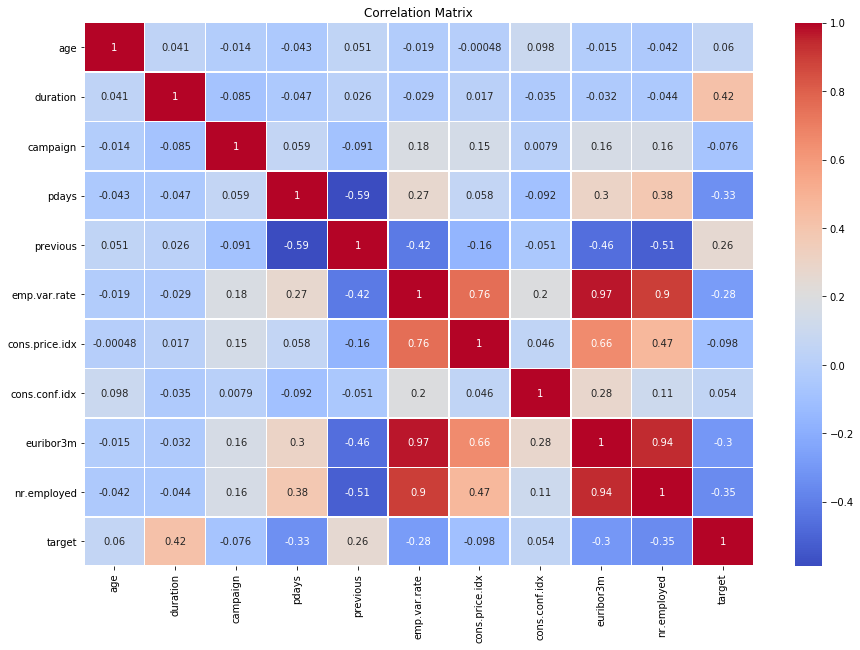

In [12]:
#Correlation analysis of numerical features to the target variable
numerical_features = data_bank_additional_values.select_dtypes(include=['number','datetime'])
numerical_features_with_target = numerical_features.copy()
#print(data_bank_additional_values.select_dtypes(include=['object']))
y = data_bank_additional_values['y'].apply(lambda x: 1 if x == 'yes' else 0)
numerical_features['target'] = y
#print(numerical_features)
correlation_matrix =  numerical_features.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
#plt.savefig('/content/gdrive/MyDrive/Practical_Application_3/correlation_matrix.png')
plt.savefig('Images/correlation_matrix.png')
plt.show()


### Observations on the correlation between the target and the numeric features
**duration** (0.42): Highest positive correlation with the target, indicates that longer durations are associated with a higher probability of the target outcome.

**pdays** (-0.33): This feature has a moderate negative correlation with the target, indicating that fewer days since the client was last contacted are associated with a higher probability of the target outcome.

**previous** (0.26): This feature has a moderate positive correlation with the target, indicating that clients contacted in previous campaigns are more likely to result in the target outcome.

**nr.employed (-0.35) and euribor3m (-0.3)**: Both features have moderate negative correlations with the target, indicating that lower values of these economic indicators are associated with a higher probability of the target outcome.

Other features like campaign, cons.price.idx, and cons.conf.idx have very low correlations with the target, indicating they may have little influence on the outcome.

**Multicollinearity**:

**emp.var.rate, euribor3m, nr.employed:** These features are highly correlated with each other (correlation coefficients > 0.9). High multicollinearity can cause issues in model interpretability and overfitting, especially in linear models, hence will drop some of these features.
emp.var.rate and cons.price.idx also show high correlation (0.76). Since emp.var.rate has a stronger correlation with the target and is highly correlated with other features, dropping cons.price.idx.

**Potential Features to Drop:**

**cons.price.idx**: It has a low correlation with the target and high correlation with emp.var.rate.

**campaign**: This feature has a very low correlation with the target (-0.076)

**One of emp.var.rate, euribor3m, or nr.employed**: Since these are highly correlated, consider keeping only the one most correlated with the target (nr.employed).

In [13]:
#Dropping features which have very low correlation with target and the features which are highly correlated to each other
features_to_drop = ['cons.price.idx', 'campaign', 'emp.var.rate', 'euribor3m']
data_bank_additional_values_reduced = data_bank_additional_values.drop(features_to_drop, axis=1)


In [14]:
#Encode the categorical variables using one hot encoding
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_bank_additional_values_reduced = pd.get_dummies(data_bank_additional_values_reduced, columns=categorical_cols)

In [15]:
#Split the data into train and test
X = data_bank_additional_values_reduced.drop('y',axis=1)
y = data_bank_additional_values_reduced['y'].apply(lambda x: 1 if x=='yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#Since the target variable is imbalanced, balancing it using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Check the distribution after SMOTE
print(pd.Series(y_train_smote).value_counts())

ModuleNotFoundError: No module named 'imblearn'

## **Train and Evaluate Classifiers**

### **Logistic Regression**

In [16]:
#Train and Evaluate the classifiers
#Logistic Regression
# Train Logistic Regression with the SMOTE resampled data
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train_smote, y_train_smote)
#Evaluate
lgr_pred = lgr.predict(X_test)
lgr_results = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_score(y_test, lgr_pred),
    'precision': precision_score(y_test, lgr_pred),
    'recall': recall_score(y_test, lgr_pred),
    'f1_score': f1_score(y_test, lgr_pred)
}
print(lgr_results)
#This is the metrics obtained without balancing the target variable
#{'model': 'Logistic Regression', 'accuracy': 0.8980582524271845, 'precision': 0.5625, 'recall': 0.391304347826087, 'f1_score': 0.46153846153846156}

{'model': 'Logistic Regression', 'accuracy': 0.8907766990291263, 'precision': 0.5185185185185185, 'recall': 0.30434782608695654, 'f1_score': 0.3835616438356165}


In [17]:
# Extract the coefficients to find the features that affect the target variable the most
coefficients = lgr.coef_[0]  # If it's a binary classification
intercept = lgr.intercept_[0]

# Pair the coefficients with their corresponding feature names
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients
print("Intercept:", intercept)
print(coef_df.sort_values(by='Coefficient', ascending=False))

Intercept: 0.4108068530044552
                          Feature  Coefficient
35                    housing_yes     2.515505
33                     housing_no     2.413161
20                 marital_single     2.266430
53                day_of_week_thu     2.249844
55                day_of_week_wed     2.239121
19                marital_married     2.225648
52                day_of_week_mon     2.196803
51                day_of_week_fri     2.168017
54                day_of_week_tue     2.105023
46                      month_mar     2.059968
39               contact_cellular     2.003910
18               marital_divorced     1.986920
28    education_university.degree     1.959504
45                      month_jun     1.930226
27  education_professional.course     1.819972
49                      month_oct     1.709591
14                    job_student     1.636399
13                   job_services     1.606134
29              education_unknown     1.587589
57           poutcome_nonexist

### Observation from the coefficients:
Strong Predictors: Features like housing_yes, marital_single, and day_of_week_thu have strong positive associations with subscribing, suggesting that these are key factors in a client's decision-making process.


### Using different methods for feature selection for Logistic Regression Classifier

In [18]:
#RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
# Initialize the model
log_reg_rfe = LogisticRegression(max_iter=1000)
# Initialize RFE
rfe = RFE(estimator=log_reg_rfe, n_features_to_select=5)  # Select the top 2 features
rfe.fit(X_train_smote, y_train_smote)
# Get the selected features
selected_features_rfe = rfe.support_
selected_feature_names_rfe = X_train_smote.columns[selected_features_rfe]
print("Selected Features (RFE):", selected_feature_names_rfe)
# Create a DataFrame to display which features were selected
#rfe_results = pd.DataFrame({
#    'Feature': selected_feature_names_rfe,
#    'Selected': selected_features_rfe
#})
#print("RFE Results:")
#print(rfe_results)
# Fit the model with the selected features
X_train_rfe = X_train_smote[selected_feature_names_rfe]
X_test_rfe = X_test[selected_feature_names_rfe]
log_reg_rfe.fit(X_train_rfe, y_train_smote)

# Evaluate the model
rfe_accuracy = log_reg_rfe.score(X_test_rfe, y_test)
print("Model accuracy with RFE-selected features:", rfe_accuracy)

# Predict using the RFE-selected model
y_pred_rfe = log_reg_rfe.predict(X_test_rfe)

# Calculate the precision score
# Since this is a multi-class classification problem, you need to specify the average method
precision_rfe = precision_score(y_test, y_pred_rfe, average='weighted')
recall = recall_score(y_test, y_pred_rfe, average='weighted')
f1 = f1_score(y_test, y_pred_rfe, average='weighted')
result_rfe = {
    'model': 'RFE',
    'accuracy': rfe_accuracy,
    'precision': precision_rfe,
    'recall': recall,
    'f1_score': f1
}
print(result_rfe)
print("Precision score with RFE-selected features:", precision_rfe)
print("Recall score with RFE-selected features:", recall)
print("F1 score with RFE-selected features:", f1)

Selected Features (RFE): Index(['day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')
Model accuracy with RFE-selected features: 0.8883495145631068
{'model': 'RFE', 'accuracy': 0.8883495145631068, 'precision': 0.7891648600245076, 'recall': 0.8883495145631068, 'f1_score': 0.8358249931364964}
Precision score with RFE-selected features: 0.7891648600245076
Recall score with RFE-selected features: 0.8883495145631068
F1 score with RFE-selected features: 0.8358249931364964


### Observation from RFE
The important features as per RFE- 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu','day_of_week_tue', 'day_of_week_wed' to drive up the subcription
Training the model on RFE, bumped up the metrics

    Model accuracy with RFE-selected features: 0.8883495145631068
    Precision score with RFE-selected features: 0.7891648600245076
    Recall score with RFE-selected features: 0.8883495145631068
    F1 score with RFE-selected features: 0.8358249931364964

In [19]:
#Lasso Regularization
from sklearn.linear_model import lasso_path
#initialize model with L1 regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso.fit(X_train_smote, y_train_smote)
#Evaluate
coefficients = lasso.coef_
selected_features_l1 = np.abs(coefficients) > 0  # Get the selected features
selected_feature_names_l1 = X_train_smote.columns[selected_features_l1[0]]
print("Selected Features (L1 Regularization):", selected_feature_names_l1)
# Evaluate the model
lasso_accuracy = lasso.score(X_test, y_test)
print("Model accuracy with L1-selected features:", lasso_accuracy)
y_pred_lasso = lasso.predict(X_test)
# Calculate the precision score
# Since this is a multi-class classification problem, you need to specify the average method
precision_lasso = precision_score(y_test, y_pred_lasso, average='weighted')
recall_lasso = recall_score(y_test, y_pred_lasso, average='weighted')
f1_lasso = f1_score(y_test, y_pred_lasso, average='weighted')
result_lasso = {
    'model': 'L1 Regularization',
    'accuracy': lasso_accuracy,
    'precision': precision_lasso,
    'recall': recall_lasso,
    'f1_score': f1_lasso
}
print(result_lasso)
print("Precision score with L1-selected features:", precision_lasso)
print("Recall score with L1-selected features:", recall_lasso)
print("F1 score with L1-selected features:", f1_lasso)

Selected Features (L1 Regularization): Index(['age', 'duration', 'pdays', 'previous', 'cons.conf.idx', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'p

### Observation from Lasso regularization
Lasso regularization shrinks the coefficients of non important features to 0, thus doing feature selection.  The fact that so many features have been selected means there are several features that affect the predictive outcome.
The features selected can be divided into groups:personal characteristics (age, job, marital status), financial indicators (duration, pdays, previous, nr.employed), and interaction-based features (contact, month, day_of_week, poutcome).
The metrics with Lasso has improved even further.


### **Using PCA with KNN and Decision Tree Classifiers**

In [20]:
#Using PCA with KNN, Decision Tree
# you must standardize the data before using PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train_smote)
knn_pred = knn.predict(X_test_pca)
results_pca = {
    'model': 'PCA + KNN',
    'accuracy': accuracy_score(y_test, knn_pred),
    'precision': precision_score(y_test, knn_pred),
    'recall': recall_score(y_test, knn_pred),
    'f1_score': f1_score(y_test, knn_pred)
}
print(results_pca)
tree = DecisionTreeClassifier()
tree.fit(X_train_pca, y_train_smote)
y_pred_tree = tree.predict(X_test_pca)
results_pca_tree = {
    'model': 'PCA + Decision Tree',
    'accuracy': accuracy_score(y_test, y_pred_tree),
    'precision': precision_score(y_test, y_pred_tree),
    'recall': recall_score(y_test, y_pred_tree),
    'f1_score': f1_score(y_test, y_pred_tree)
}
print(results_pca_tree)
#{'model': 'PCA + KNN', 'accuracy': 0.7439320388349514, 'precision': 0.22065727699530516, 'recall': 0.5108695652173914, 'f1_score': 0.30819672131147546}
#{'model': 'PCA + Decision Tree', 'accuracy': 0.7160194174757282, 'precision': 0.22692307692307692, 'recall': 0.6413043478260869, 'f1_score': 0.33522727272727276}

{'model': 'PCA + KNN', 'accuracy': 0.7487864077669902, 'precision': 0.21393034825870647, 'recall': 0.4673913043478261, 'f1_score': 0.2935153583617748}
{'model': 'PCA + Decision Tree', 'accuracy': 0.7014563106796117, 'precision': 0.192, 'recall': 0.5217391304347826, 'f1_score': 0.2807017543859649}


In [21]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
#dct.fit(X_train, y_train)
dct.fit(X_train_smote, y_train_smote)
#Evaluate
dct_pred = dct.predict(X_test)
dct_results = {
    'model': 'Decision Tree',
    'accuracy': accuracy_score(y_test, dct_pred),
    'precision': precision_score(y_test, dct_pred),
    'recall': recall_score(y_test, dct_pred),
    'f1_score': f1_score(y_test, dct_pred)
}
print(dct_results)
#{'model': 'Decision Tree', 'accuracy': 0.883495145631068, 'precision': 0.4777777777777778, 'recall': 0.4673913043478261, 'f1_score': 0.4725274725274725}

{'model': 'Decision Tree', 'accuracy': 0.875, 'precision': 0.44554455445544555, 'recall': 0.4891304347826087, 'f1_score': 0.46632124352331605}


In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
#KNN.fit(X_train, y_train)
KNN.fit(X_train_smote, y_train_smote)
#Evaluate
KNN_pred = KNN.predict(X_test)
KNN_results = {
    'model': 'KNN',
    'accuracy': accuracy_score(y_test, KNN_pred),
    'precision': precision_score(y_test, KNN_pred),
    'recall': recall_score(y_test, KNN_pred),
    'f1_score': f1_score(y_test, KNN_pred)
}
print(KNN_results)

#{'model': 'KNN', 'accuracy': 0.8859223300970874, 'precision': 0.4868421052631579, 'recall': 0.40217391304347827, 'f1_score': 0.44047619047619047}

{'model': 'KNN', 'accuracy': 0.8385922330097088, 'precision': 0.39037433155080214, 'recall': 0.7934782608695652, 'f1_score': 0.5232974910394265}


### **Observation from KNN and Decision Tree Classifier**
The analysis was carried out with
1. original train and test set
2. balanced train and test set (using SMOTE)
3. Using PCA

The performance of both KNN and Decision Tree Classifier improved using the balanced training set. The performance went down using PCA.
PCA reduces dimensionality by combining features that reduce dimensionality and maximizes variance. Decision Tree tends to work better with original features rather than abstract components that combine multiple features.
KNN Relies on Distance: KNN is a distance-based algorithm, meaning it classifies data points based on the proximity (distance) to other points in the feature space. PCA, by reducing the dimensionality, might alter the distances between data points in a way that does not preserve the original local structure (i.e., the relationships between neighbors). This can result in misclassifications because KNN might now incorrectly identify which points are nearest neighbors.

In [23]:
#SVM
from sklearn.svm import SVC
svm = SVC()
#svm.fit(X_train, y_train)
svm.fit(X_train_smote, y_train_smote)
#Evaluate
svm_pred = svm.predict(X_test)
svm_results = {
    'model': 'SVM',
    'accuracy': accuracy_score(y_test, svm_pred),
    'precision': precision_score(y_test, svm_pred, pos_label=1),
    'recall': recall_score(y_test, svm_pred, pos_label=1),
    'f1_score': f1_score(y_test, svm_pred, pos_label=1)
}
print(svm_results)
#{'model': 'SVM', 'accuracy': 0.8992718446601942, 'precision': 0.6551724137931034, 'recall': 0.20652173913043478, 'f1_score': 0.3140495867768595}

{'model': 'SVM', 'accuracy': 0.837378640776699, 'precision': 0.3894736842105263, 'recall': 0.8043478260869565, 'f1_score': 0.524822695035461}


In [24]:
# Train SVM with class weights
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)

# Evaluate on the original test set
y_pred_svm_weighted = svm_weighted.predict(X_test)
svm_weighted_results = {
    'model': 'SVM (Class Weight Balanced)',
    'accuracy': accuracy_score(y_test, y_pred_svm_weighted),
    'precision': precision_score(y_test, y_pred_svm_weighted),
    'recall': recall_score(y_test, y_pred_svm_weighted),
    'f1_score': f1_score(y_test, y_pred_svm_weighted)
}
print(svm_weighted_results)

{'model': 'SVM (Class Weight Balanced)', 'accuracy': 0.837378640776699, 'precision': 0.38202247191011235, 'recall': 0.7391304347826086, 'f1_score': 0.5037037037037037}


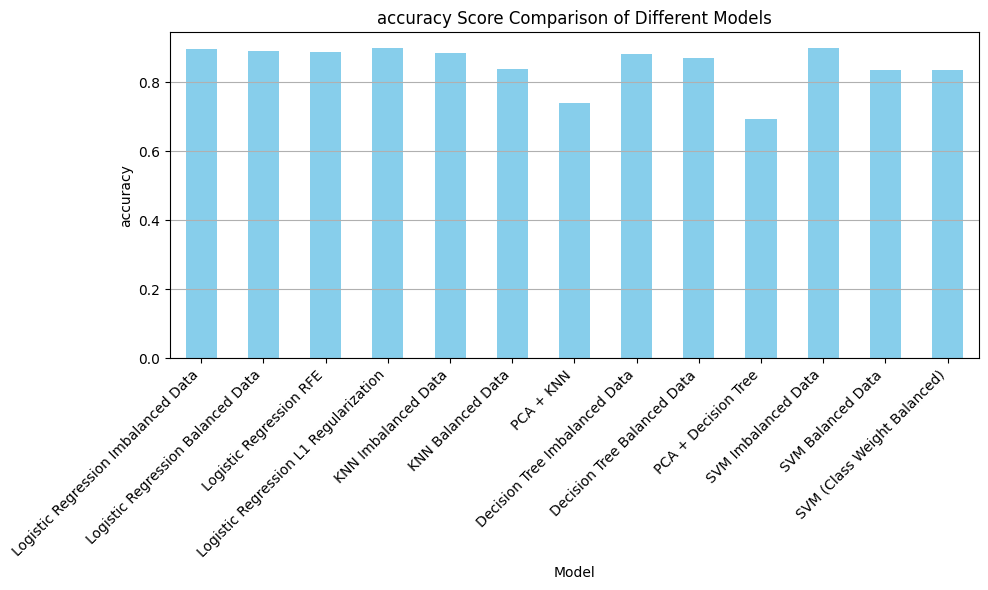

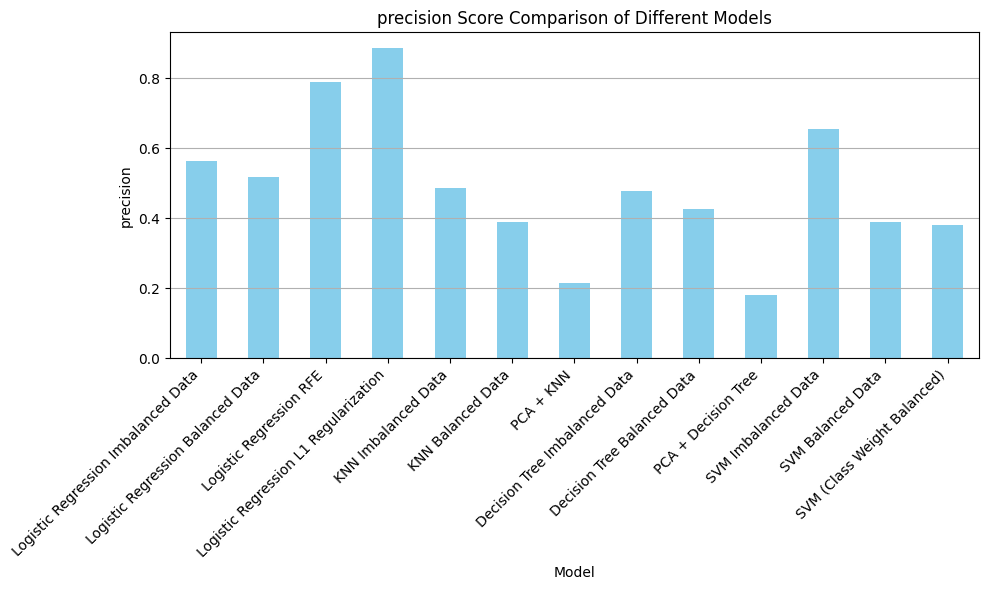

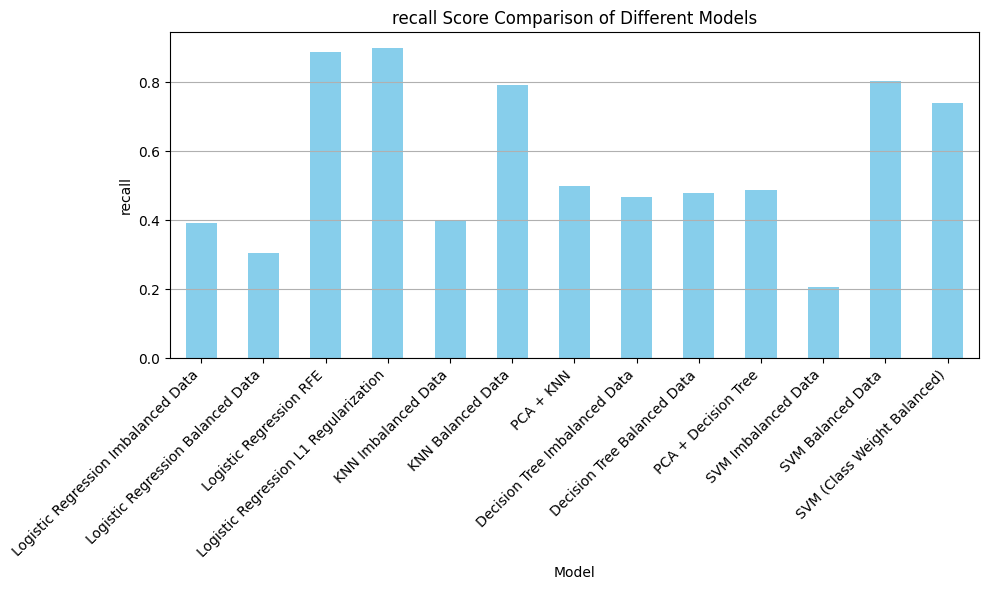

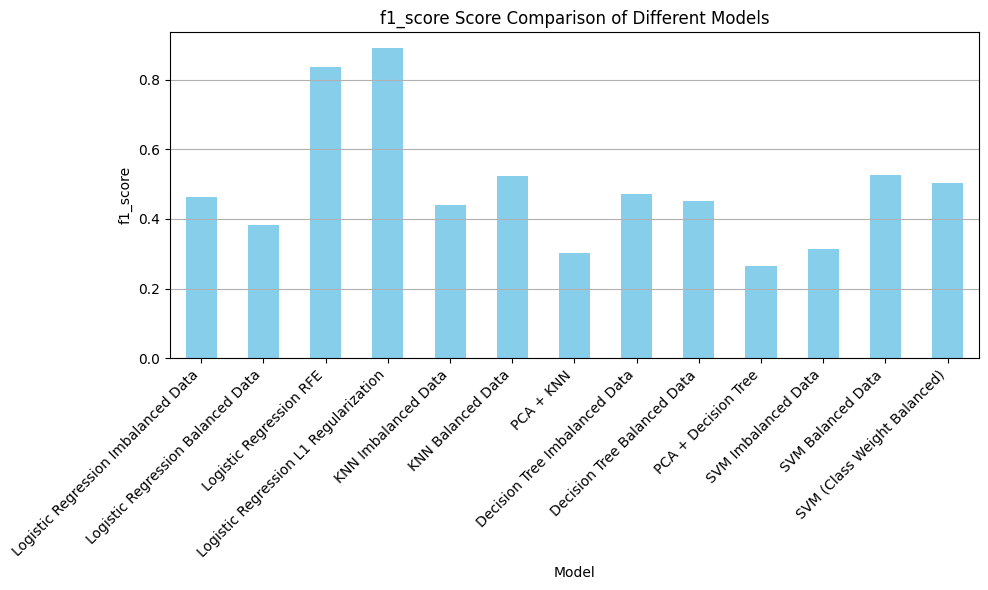

In [27]:
import os
#save_directory = '/content/gdrive/MyDrive/Practical_Application_3/'
save_directory = 'Images/'
#comparing the metrics of each classifier by plotting
results = [
    {'model': 'Logistic Regression Imbalanced Data', 'accuracy': 0.8980582524271845, 'precision': 0.5625, 'recall': 0.391304347826087, 'f1_score': 0.46153846153846156},
    {'model': 'Logistic Regression Balanced Data', 'accuracy': 0.8907766990291263, 'precision': 0.5185185185185185, 'recall': 0.30434782608695654, 'f1_score': 0.3835616438356165},
    {'model': 'Logistic Regression RFE', 'accuracy': 0.8883495145631068, 'precision': 0.7891648600245076, 'recall': 0.8883495145631068, 'f1_score': 0.8358249931364964},
    {'model': 'Logistic Regression L1 Regularization', 'accuracy': 0.9004854368932039, 'precision': 0.8872015791524762, 'recall': 0.9004854368932039, 'f1_score': 0.8910745466022149},
	  {'model': 'KNN Imbalanced Data', 'accuracy': 0.8859223300970874, 'precision': 0.4868421052631579, 'recall': 0.40217391304347827, 'f1_score': 0.44047619047619047},
	  {'model': 'KNN Balanced Data', 'accuracy': 0.8385922330097088, 'precision': 0.39037433155080214, 'recall': 0.7934782608695652, 'f1_score': 0.5232974910394265},
    {'model': 'PCA + KNN', 'accuracy': 0.7402912621359223, 'precision': 0.21495327102803738, 'recall': 0.5, 'f1_score': 0.3006535947712418},
	  {'model': 'Decision Tree Imbalanced Data', 'accuracy': 0.883495145631068, 'precision': 0.4777777777777778, 'recall': 0.4673913043478261, 'f1_score': 0.4725274725274725},
	  {'model': 'Decision Tree Balanced Data', 'accuracy': 0.8701456310679612, 'precision': 0.42718446601941745, 'recall': 0.4782608695652174, 'f1_score': 0.4512820512820513},
	  {'model': 'PCA + Decision Tree', 'accuracy': 0.6953883495145631, 'precision': 0.18072289156626506, 'recall': 0.4891304347826087, 'f1_score': 0.26392961876832843},
	  {'model': 'SVM Imbalanced Data', 'accuracy': 0.8992718446601942, 'precision': 0.6551724137931034, 'recall': 0.20652173913043478, 'f1_score': 0.3140495867768595},
	  {'model': 'SVM Balanced Data', 'accuracy': 0.837378640776699, 'precision': 0.3894736842105263, 'recall': 0.8043478260869565, 'f1_score': 0.524822695035461},
	  {'model': 'SVM (Class Weight Balanced)', 'accuracy': 0.837378640776699, 'precision': 0.38202247191011235, 'recall': 0.7391304347826086, 'f1_score': 0.5037037037037037}
]
# Create DataFrame
results_df = pd.DataFrame(results).set_index('model')
#results_df.to_csv('/content/gdrive/MyDrive/Practical_Application_3/results.csv')
results_df.to_csv('Data/results.csv')
# Plotting
for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
  plt.figure(figsize=(10, 6))
  results_df[metric].plot(kind='bar', color='skyblue')
  plt.title(f"{metric} Score Comparison of Different Models")
  plt.xlabel('Model')
  plt.ylabel(metric)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y')
  # Create the full file path
  filename = os.path.join(save_directory, f"Comparison_of_{metric}.png")
  plt.savefig(filename)  # Save the plot with the filename

  # Display the plot
  plt.tight_layout()
  plt.show()

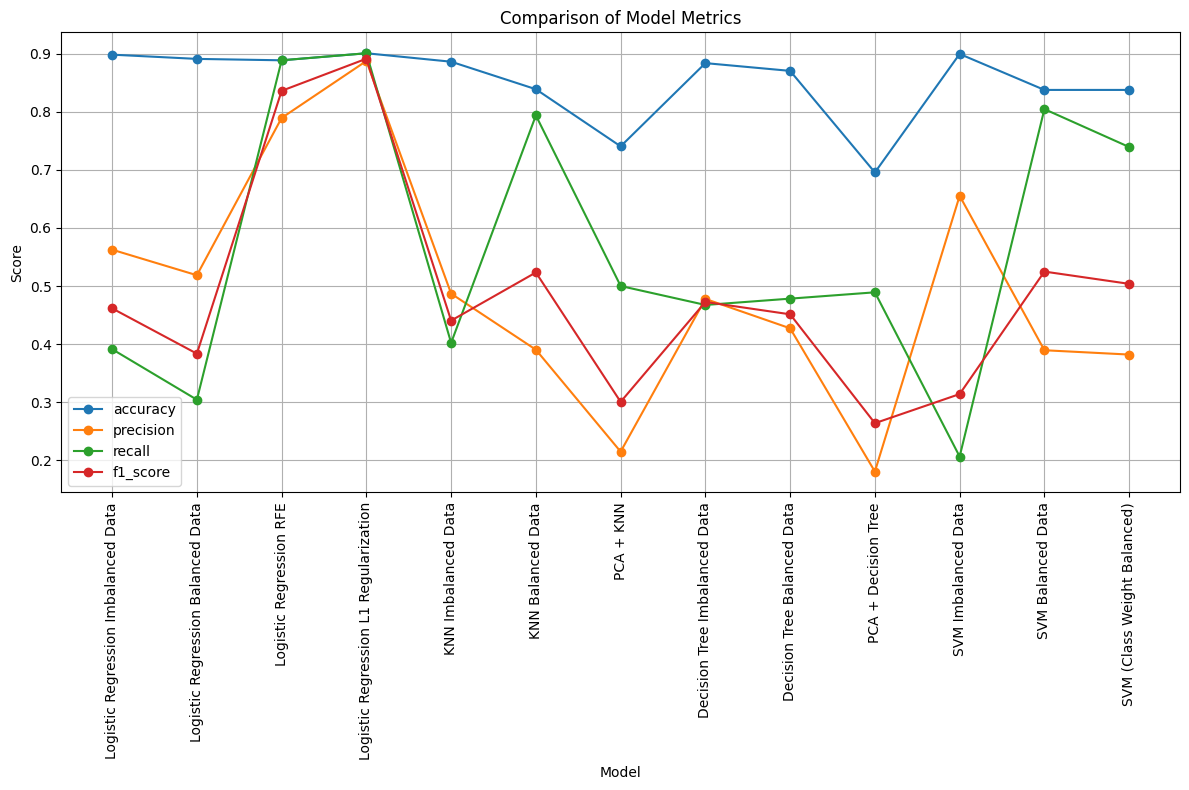

In [28]:
# Plot the metrics using a line plot
plt.figure(figsize=(12, 8))

for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('/content/gdrive/MyDrive/Practical_Application_3/Comparison_of_ALLMetrics.png')
plt.savefig('Images/Comparison_of_ALLMetrics.png')
plt.show()